In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


# Load Data

In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

In [3]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Drop NaN label & Preprocessing data

In [5]:
# labels
train.dropna(axis = 0, subset = 'Class', inplace = True)

y_train = train['Class']
assert not np.any(np.isnan(y_train.values))

In [6]:
from sklearn import preprocessing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# train
train_EJ = train['EJ']
X_train = train.drop(['Id', 'Class','EJ'], axis = 1)
X_train.fillna(X_train.mean(), inplace = True)

X_train = pd.DataFrame(preprocessing.scale(X_train))
X_train['EJ_A'] = (train_EJ == "A").astype(int)
X_train['EJ_B'] = (train_EJ == 'B').astype(int)

assert not np.any(np.isnan(X_train.values))
print(len(X_train.columns))
# X_train.head()

57


In [8]:
# test
Id = test['Id']
test_EJ = test['EJ']
X_test = test.drop(['Id','EJ'], axis = 1)
X_test.fillna(X_test.mean(), inplace = True)

X_test = pd.DataFrame(preprocessing.scale(X_test))
X_test['EJ_A'] = (test_EJ == "A").astype(int)
X_test['EJ_B'] = (test_EJ == "B").astype(int)

assert not np.any(np.isnan(X_test.values))
print(len(X_test.columns))
X_test.head()

57


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,EJ_A,EJ_B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


# Feature selection

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth = 3, learning_rate = 0.01, n_estimators = 100)
model.fit(X_train, y_train)
model.feature_importances_

array([0.04692246, 0.        , 0.00868781, 0.        , 0.        ,
       0.        , 0.0082796 , 0.        , 0.08387097, 0.00049515,
       0.00500505, 0.        , 0.02374471, 0.00536009, 0.        ,
       0.        , 0.00436951, 0.01698006, 0.        , 0.        ,
       0.        , 0.06663211, 0.00391658, 0.        , 0.        ,
       0.07840092, 0.04563806, 0.        , 0.01436914, 0.04315638,
       0.03175075, 0.01961156, 0.15039295, 0.        , 0.00554262,
       0.02126796, 0.05714305, 0.02304943, 0.        , 0.02276724,
       0.02387688, 0.        , 0.01614378, 0.05725603, 0.01536641,
       0.02972848, 0.02254557, 0.02447575, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02325301,
       0.        , 0.        ], dtype=float32)

In [10]:
# drop with importances
features = model.feature_importances_
for i in range(100):
    model = XGBClassifier(max_depth = 6, learning_rate = 0.01, n_estimators = 100,
                         random_state = 300 + i)
    model.fit(X_train, y_train)
    features += model.feature_importances_
print(features)

badfeatures = features < 0.5
droplist = []
for i in range(len(badfeatures)):
    if badfeatures[i]:
        droplist.append(X_train.columns[i])
print(droplist)
X_train.drop(droplist, axis = 1, inplace = True)
X_test.drop(droplist, axis = 1, inplace = True)

[4.0032210e+00 1.3511183e+00 1.4540286e-01 1.0507392e+00 1.7154338e+00
 1.0879451e+00 1.0836494e+00 9.3232518e-01 8.9550476e+00 9.2621341e-02
 7.5585073e-01 3.5867390e-01 1.2309179e+00 9.7582382e-01 6.3735843e-01
 1.8095733e+00 2.2116857e+00 1.8020310e+00 6.7115813e-01 9.3089312e-01
 5.7772988e-01 5.3382096e+00 2.3365560e+00 6.4082330e-01 9.6433228e-03
 4.1360207e+00 9.5516950e-01 0.0000000e+00 1.5036024e+00 8.7445515e-01
 1.3802823e+00 1.1340941e+00 1.9227522e+01 0.0000000e+00 1.2737113e+00
 1.5548754e+00 2.8955638e+00 1.8714038e+00 2.4036887e+00 5.7972300e-01
 2.0501378e+00 5.2435344e-01 1.9731406e+00 2.4275579e+00 5.3890389e-01
 3.0300658e+00 2.2386382e+00 2.2927656e+00 1.8469962e+00 5.6242013e-01
 1.3159273e+00 2.3925804e-02 3.7398914e-01 4.4852418e-01 8.5808152e-01
 0.0000000e+00 0.0000000e+00]
[2, 9, 11, 24, 27, 33, 51, 52, 53, 'EJ_A', 'EJ_B']


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

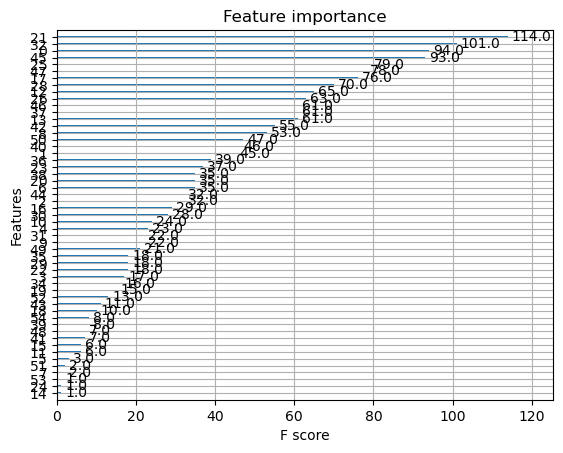

In [11]:
from xgboost import plot_importance
plot_importance(model)

# Tree ensemble

In [12]:
# Repeated Stratified k-fold
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits = 8, n_repeats = 10, random_state = 2000)

In [13]:
# ensemble trees
import copy
def ensemble(rskf, X, y):
    X=X.to_numpy()
    y=y.to_numpy()
    models = []
    models_list = []
    for train_idx, test_idx in rskf.split(X, y):
        X_val, y_val = X[test_idx], y[test_idx]
        X_train, y_train = X[train_idx], y[train_idx]
        model = XGBClassifier(max_depth = 6, learning_rate = 0.01, n_estimators = 100)
        model.fit(X_train, y_train)
        models.append(model)
        models_list.append(copy.deepcopy(models))
    return models_list, models
models_list, last_models= ensemble(rskf, X_train, y_train)

In [14]:
from sklearn.metrics import log_loss
def balanced_log_loss(y_true, y_pred):
    y_true = np.asarray(y_true, dtype='int64')
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1/nc[y_true], eps=1e-15)
# balanced_log_loss(y_val, yhat)

In [15]:
# compute loss
def test_models(models, X_val, y_val, evaluator):
    preds = np.zeros((len(y_val), 2))
    for model in models:
        yhat = model.predict_proba(X_val)
        preds += yhat
    preds/= len(models)
    loss = evaluator(y_val, preds)
    return loss
# test_models(last_models, X_val, y_val, balanced_log_loss)

In [16]:
from sklearn.model_selection import train_test_split
def find_best_model(models_list, evaluator, X, y, rskf):
    best_loss = 100
    best_model = []
    X=X.to_numpy()
    y=y.to_numpy()
    
    for models in models_list:
        loss = 0
        for train_idx, test_idx in rskf.split(X, y):
            X_val, y_val = X[test_idx], y[test_idx]
            loss += test_models(models, X_val, y_val, balanced_log_loss)
        print(f'Loss = {loss}')
        if loss < best_loss:
            best_model = models
            best_loss = loss
    print(f'Best Loss = {best_loss}')
    return best_model   
best_model = find_best_model(models_list, balanced_log_loss, X_train, y_train, rskf)

Loss = 27.743864779617265
Loss = 26.861970087787007
Loss = 26.648013841215366
Loss = 26.782978463364092
Loss = 26.74323128719291
Loss = 26.650205134845642
Loss = 26.648933693186688
Loss = 26.628144330263396
Loss = 26.602227536122275
Loss = 26.590458824498
Loss = 26.591381654207453
Loss = 26.56706857252455
Loss = 26.549610137934327
Loss = 26.583644141504973
Loss = 26.560617050860717
Loss = 26.554907879737307
Loss = 26.58685690891643
Loss = 26.544260027185658
Loss = 26.55216636361139
Loss = 26.533874331076557
Loss = 26.512020746256265
Loss = 26.480446998874942
Loss = 26.481001020929476
Loss = 26.511162634322137
Loss = 26.51935639137976
Loss = 26.474105972932975
Loss = 26.469722531399228
Loss = 26.516876591939685
Loss = 26.517641667110418
Loss = 26.501344448018916
Loss = 26.502095781344348
Loss = 26.537041649231355
Loss = 26.51932498896777
Loss = 26.535431149119532
Loss = 26.53562602568905
Loss = 26.535447461353257
Loss = 26.51839244502078
Loss = 26.542390883810373
Loss = 26.5366529249357

# Submit

In [17]:
predictions = np.zeros((len(X_test), 2))
for model in best_model:
    predictions += model.predict_proba(X_test)
predictions/=len(best_model)
print(predictions)

[[0.7161818 0.2838182]
 [0.7161818 0.2838182]
 [0.7161818 0.2838182]
 [0.7161818 0.2838182]
 [0.7161818 0.2838182]]


In [18]:
output = pd.DataFrame({
    'Id':Id
})
output[['class_0','class_1']] = predictions
output.to_csv('/kaggle/working/submission.csv', index=False)